In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy import stats
import plotly.graph_objs as go

plt.style.use('bmh')

In [2]:
# loading data to df

df = pd.read_csv(r"C:\Users\User\Desktop\Phyton\Data Science\loan\loan.csv")
df.head()

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

In [3]:
df.shape

(887379, 74)

In [4]:
# df_new1 = df.copy()
# df_new1.shape

(887379, 74)

# Анализируем наш таргет loan_status

In [29]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

<Figure size 2160x2160 with 0 Axes>

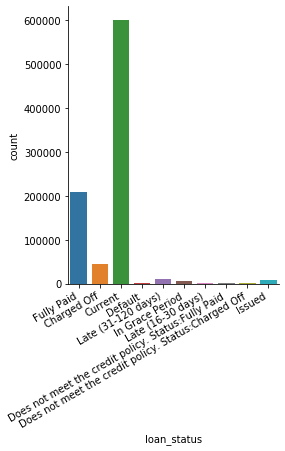

In [30]:
# distribution of target series (initail data)

plt.figure(figsize=(30,30))
target_dist = sns.catplot(x='loan_status',kind='count',data=df,orient="h")
target_dist.fig.autofmt_xdate()

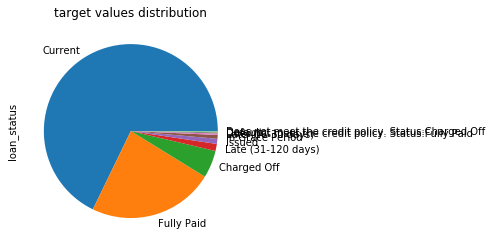

In [31]:
# # distribution of target series (initail data)

# df.loan_status.value_counts().plot(kind="pie")
# plt.title(f"target values distribution")
# plt.grid()
# plt.show()

# Преобразуем наш таргет в бинарную фичу, где 0 - это хороший кредит, 1 - не очень (классифицируем все типы кредитов)

In [3]:
df.replace(to_replace=['Current', 'Fully Paid', 'Issued', 'Charged Off', 'Late (31-120 days)','In Grace Period','Late (16-30 days)','Does not meet the credit policy. Status:Fully Paid','Default','Does not meet the credit policy. Status:Charged Off'],
           value= ['0','0','0','1','1','1','1','1','1','1'], 
           inplace=True)

<Figure size 2160x2160 with 0 Axes>

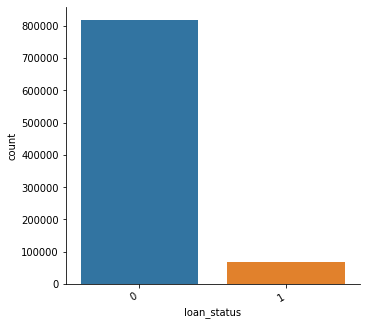

In [36]:
# distribution of target series (after groupping)

plt.figure(figsize=(30,30))
target_dist = sns.catplot(x='loan_status',kind='count',data=df,orient="h")
target_dist.fig.autofmt_xdate()


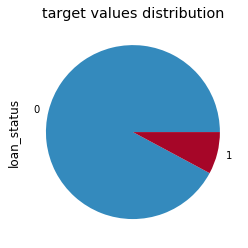

In [4]:
# distribution of target series (after groupping)


df.loan_status.value_counts().plot(kind="pie")
plt.title(f"target values distribution")
plt.grid()
plt.show()

# Отображение Nan наших фич 

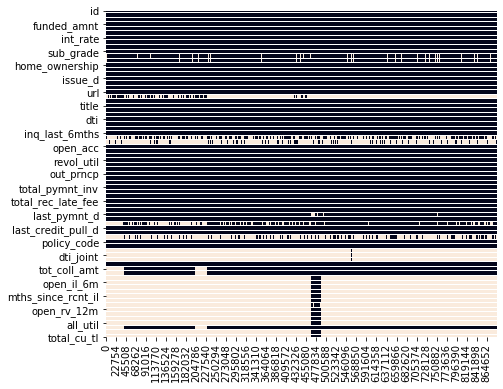

In [34]:
# # наны

# plt.figure(figsize=(7,6))
# sns.heatmap(df.isnull().T, cbar=False)    #.T -транспонированная
# plt.show()

In [3]:
# #@title Plotly missing data function
# def plot_missing_data_ratio(df):
#     temp_df = pd.DataFrame((df.isnull().sum() / len(df)).apply(lambda x: round(1-x, 3)))
#     temp_df = temp_df.reset_index(drop=False)
#     temp_df.rename(columns={'index': 'column_name', 0: 'completeness_ratio'}, inplace=True)
#     temp_df = temp_df.sort_values('completeness_ratio')
    
#     totals = pd.DataFrame(df.isnull().sum()).reset_index(drop=False)
#     totals.rename(columns={'index': 'column_name', 0: 'missing_count'}, inplace=True)
    
#     temp_df = temp_df.merge(totals, how='left', on='column_name')
    
#     trace = go.Bar(
#         x=temp_df['completeness_ratio'], 
#         y=temp_df['column_name'],
#         text=temp_df['missing_count'].apply(lambda x: '{} missing values'.format(x)),
#         orientation = 'h',
#         marker=dict(color='#001f3f'),
#         opacity=0.7
#     )
    
#     layout = go.Layout(
#         title='Ratio of Column Completeness in the Dataset',
#         xaxis=dict(title='Completeness Ratio'),
#         yaxis=dict(title='Column Name'),
#         height=400,
#         margin=go.layout.Margin(l=200)
#     )
    
#     fig = go.Figure(data=[trace], layout=layout)
#     iplot(fig)

In [4]:
# plot_missing_data_ratio(df=df)

In [4]:
df['loan_status'] = df['loan_status'].fillna(0.0).astype(int)

# Корреляционная таблица

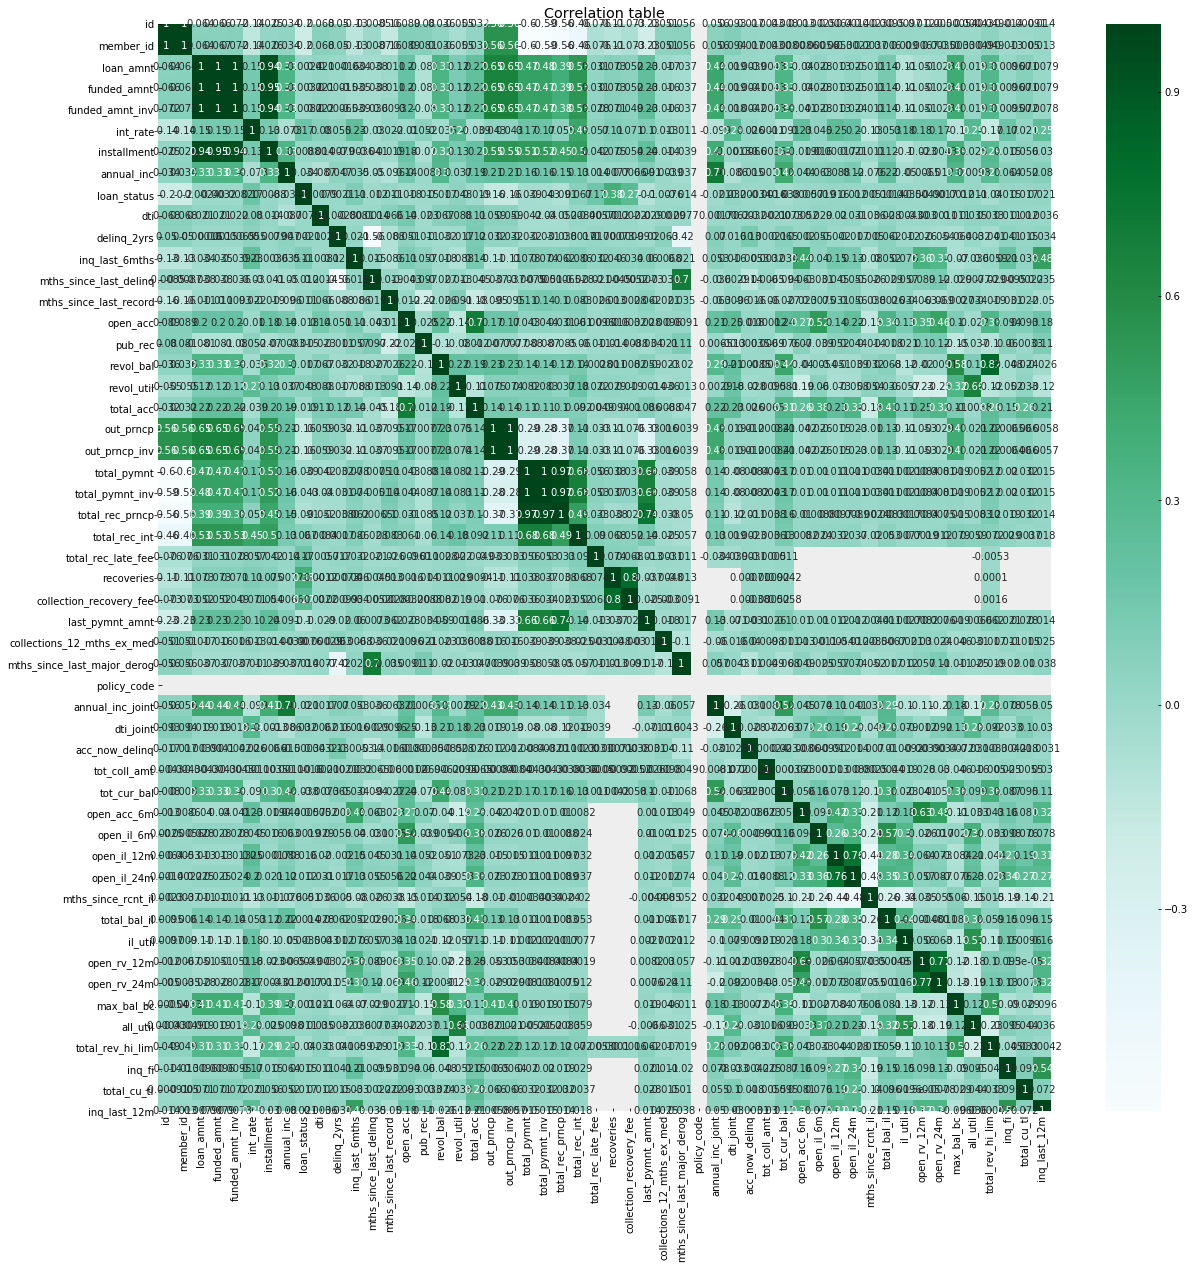

In [60]:
# # correlation table
# corr = df.corr()
# plt.figure(figsize=(20,20))
# plt.title('Correlation table')

# sns.heatmap(corr, annot=True, cmap="BuGn")    #cmap - цвет
# plt.show()

In [64]:
# # cool heatmap 

# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')

# Чистим Nan

In [5]:
# увеличивает число строк отображаемых в ноутбуке, не будет срезаться

pd.options.display.max_rows = 4000
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [6]:
# удаляем фичи где кол-во nan > 250 000

for column in df:
    if sum(df[column].isnull()) >= 250000:
        df.drop(column, axis=1, inplace=True)

In [7]:
pd.options.display.max_rows = 4000
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     51462
emp_length                    44825
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                           152
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                    

In [9]:
# срезалось более 20 фичей :)

df.shape

(887379, 52)

# Target двигаем в конец датасета

In [8]:
# ф-ция которая меняет порядок колонок

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [9]:
# передвигаем наш таргет loan_status в самый конец

df = movecol(df, 
             cols_to_move=['loan_status'], 
             ref_col='total_rev_hi_lim',
             place='After')
df.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   

   int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0     10.65       162.87     B        B2  ...          171.62   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0           Jan-2016                        0.0          1.0       INDIVIDUAL   

  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim loan_status  
0            0.0          NaN         NaN              NaN           0  

[1 rows x 52 columns]

In [12]:
df.shape

(887379, 52)

In [13]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

# Выбираем числовые фичи, имеющие важное экономическое значение в предметной области

In [15]:
# # Удаляем строки с нанами

# new_data = df.dropna(axis = 0, how ='any')
# new_data.shape

(752938, 52)

In [16]:
# We choose numeric features that have sufficent impact on loan qualities

# ROC AUC _score:  0.93030

# columns_to_keep = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','installment',
#                    'annual_inc', 'dti','total_pymnt','total_pymnt_inv','total_rec_prncp',
#                    'total_rec_int','total_rec_late_fee','last_pymnt_amnt','tot_coll_amt',
#                    'tot_cur_bal','total_rev_hi_lim']

# len(columns_to_keep)

16

In [33]:
#  - ROC AUC _score:  0.93030
# - accuracy_score:  0.85692
# - f1_score:  0.83862
 
# columns_to_keep = ['int_rate', 'installment', 'total_pymnt', 'total_rec_prncp', 
#                    'total_rec_late_fee',  'tot_cur_bal', 'total_rev_hi_lim', 'recoveries', 
#                    'out_prncp_inv', 'collection_recovery_fee', 'inq_last_6mths',]

# len(columns_to_keep)

11

In [111]:
# CatBoost classifier:
#  - ROC AUC _score:  0.93214
#  - accuracy_score:  0.85960
#  - f1_score:  0.84091

# columns_to_keep = ['int_rate', 'installment', 'total_pymnt', 'total_rec_prncp', 
#                    'total_rec_late_fee',  'tot_cur_bal', 'total_rev_hi_lim', 'recoveries', 
#                    'out_prncp_inv', 'collection_recovery_fee', 'inq_last_6mths', 'sub_grade']

# len(columns_to_keep)

columns_to_keep = ['int_rate', 'installment', 'total_rec_prncp', 
                   'total_rec_late_fee',  'tot_cur_bal', 'total_rev_hi_lim', 'recoveries', 
                   'out_prncp_inv', 'inq_last_6mths', 'sub_grade']

len(columns_to_keep)

10

In [112]:
df = df[columns_to_keep + ['loan_status']]

df.head(1)

int_rate  installment  total_rec_prncp  total_rec_late_fee  tot_cur_bal  \
0     10.65       162.87           5000.0                 0.0          NaN   

   total_rev_hi_lim  recoveries  out_prncp_inv  inq_last_6mths  sub_grade  \
0               NaN         0.0            0.0             1.0          6   

   loan_status  
0            0

In [130]:
# ячейка нужна только если добавляем sub_grade в модель

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df.head(1)

int_rate  installment  total_rec_prncp  total_rec_late_fee  tot_cur_bal  \
0     10.65       162.87           5000.0                 0.0          NaN   

   total_rev_hi_lim  recoveries  out_prncp_inv  inq_last_6mths  sub_grade  \
0               NaN         0.0            0.0             1.0          6   

   loan_status  
0            0

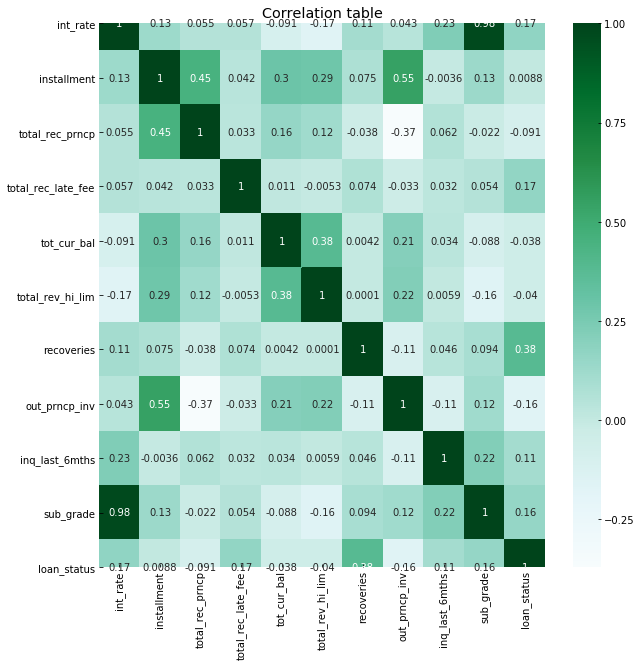

In [131]:
# correlation table
corr = df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation table')

sns.heatmap(corr, annot=True, cmap="BuGn")    #cmap - цвет
plt.show()

+ 'installment' -  The monthly payment owed by the borrower if the loan originates 
- 'tot_cur_bal' - Total current balance of all accounts
- 'total_rev_hi_lim' - Total revolving high credit/credit limit
- 'inq_last_6mths' - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

- 'int_rate' -  Interest Rate on the loan
- 'total_pymnt' - Total payment made borower from loan provided date
+ 'total_rec_prncp' - Remaining outstanding principal for total amount funded 
- 'total_rec_late_fee' - Late fees received to date 
+ 'recoveries' - Money payd to collection companies, when loan go unpaid and a creditor hires a third party, known as a collection service
+ 'out_prncp_inv' - Remaining outstanding principal for portion of total amount funded by investors
+ 'collection_recovery_fee' - Post charge off collection fee 
- 'sub_grade' - LC assigned loan grade

In [114]:
# кол-во нулей и единичек таргета

df['loan_status'].value_counts()

0    817962
1     69417
Name: loan_status, dtype: int64

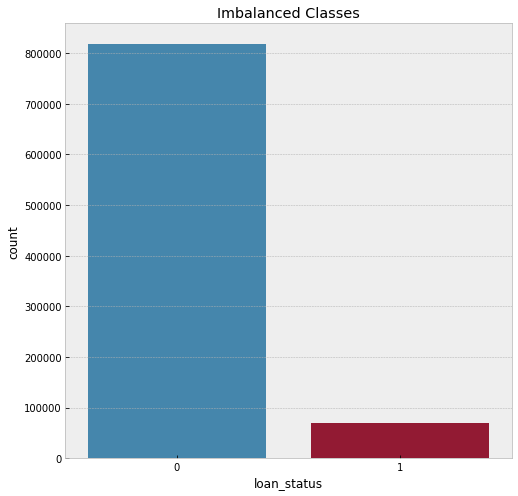

In [18]:
#plot the dataset before the undersampling

plt.figure(figsize=(8, 8))
sns.countplot('loan_status', data=df)
plt.title('Imbalanced Classes')
plt.show()

In [115]:
# train/test split

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# CatBoost Model class 1 weighted

In [16]:
from catboost import CatBoostClassifier

In [124]:
# {'depth': 7, 'iterations': 200, 'learning_rate': 0.1, 'scale_pos_weight': 4}

model_cat = CatBoostClassifier(iterations=200, depth=7, learning_rate=0.1, scale_pos_weight=4)

model_cat.fit(X_train, y_train)

0:	learn: 0.5825140	total: 367ms	remaining: 1m 13s
1:	learn: 0.5062331	total: 768ms	remaining: 1m 16s
2:	learn: 0.4502969	total: 1.14s	remaining: 1m 14s
3:	learn: 0.4088183	total: 1.51s	remaining: 1m 13s
4:	learn: 0.3816320	total: 1.86s	remaining: 1m 12s
5:	learn: 0.3588708	total: 2.22s	remaining: 1m 11s
6:	learn: 0.3406477	total: 2.59s	remaining: 1m 11s
7:	learn: 0.3249721	total: 2.95s	remaining: 1m 10s
8:	learn: 0.3116133	total: 3.32s	remaining: 1m 10s
9:	learn: 0.3040925	total: 3.67s	remaining: 1m 9s
10:	learn: 0.2965056	total: 4.03s	remaining: 1m 9s
11:	learn: 0.2906338	total: 4.39s	remaining: 1m 8s
12:	learn: 0.2838141	total: 4.77s	remaining: 1m 8s
13:	learn: 0.2786055	total: 5.14s	remaining: 1m 8s
14:	learn: 0.2753034	total: 5.5s	remaining: 1m 7s
15:	learn: 0.2724170	total: 5.84s	remaining: 1m 7s
16:	learn: 0.2696493	total: 6.21s	remaining: 1m 6s
17:	learn: 0.2676362	total: 6.57s	remaining: 1m 6s
18:	learn: 0.2660570	total: 6.93s	remaining: 1m 5s
19:	learn: 0.2641134	total: 7.29s

In [125]:
test_y_pred4 = model_cat.predict(X_test)

In [126]:
# make predictions on a test set and get AUC score

print("Sklearn CatBoost classifier:")
y_pred = model_cat.predict_proba(X_test)

print(f" - roc_auc_score: {roc_auc_score(y_test, y_pred[:,1]): .5f}")

# # roc_auc_score(y_test, y_pred[:,1])

Sklearn CatBoost classifier:
 - roc_auc_score:  0.93229


In [127]:
# Accuracy score, f1_score

print("Sklearn CatBoost classifier:")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred4): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred4): .5f}")

Sklearn CatBoost classifier:
 - accuracy_score:  0.97248
 - f1_score:  0.80042


In [83]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

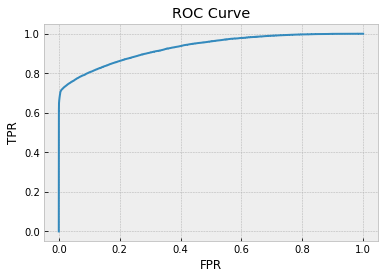

In [84]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Hyperparametres for CatBoost class 1 weighted

In [109]:
# Hyperparametres class_weights = (1, 11) , scale_pos_weight=11

model_cat2 = CatBoostClassifier(
    learning_rate =0.1,
    n_estimators=200,
    max_depth=7,   
    subsample=0.65,
    scale_pos_weight=4
    )

model_cat2.fit(X_train, y_train)

test_y_pred2 = model_cat2.predict(X_test)

y_pred2 = model_cat2.predict_proba(X_test)



0:	learn: 0.5831209	total: 384ms	remaining: 1m 16s
1:	learn: 0.5034432	total: 743ms	remaining: 1m 13s
2:	learn: 0.4501891	total: 1.11s	remaining: 1m 13s
3:	learn: 0.4092481	total: 1.48s	remaining: 1m 12s
4:	learn: 0.3766404	total: 1.84s	remaining: 1m 11s
5:	learn: 0.3557492	total: 2.19s	remaining: 1m 10s
6:	learn: 0.3362733	total: 2.54s	remaining: 1m 10s
7:	learn: 0.3228283	total: 2.89s	remaining: 1m 9s
8:	learn: 0.3111855	total: 3.25s	remaining: 1m 8s
9:	learn: 0.3012704	total: 3.6s	remaining: 1m 8s
10:	learn: 0.2927990	total: 3.95s	remaining: 1m 7s
11:	learn: 0.2859326	total: 4.31s	remaining: 1m 7s
12:	learn: 0.2804665	total: 4.68s	remaining: 1m 7s
13:	learn: 0.2768223	total: 5.04s	remaining: 1m 6s
14:	learn: 0.2735462	total: 5.38s	remaining: 1m 6s
15:	learn: 0.2699124	total: 5.73s	remaining: 1m 5s
16:	learn: 0.2673382	total: 6.07s	remaining: 1m 5s
17:	learn: 0.2653928	total: 6.42s	remaining: 1m 4s
18:	learn: 0.2640525	total: 6.78s	remaining: 1m 4s
19:	learn: 0.2616772	total: 7.13s	r

In [110]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred2[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred2): .5f}")
print(f" - f1_score 1-st class: {f1_score(y_test, test_y_pred2): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred2, average='macro'): .5f}")
# Average=weighted

CatBoost classifier:
 - ROC AUC _score:  0.93167
 - accuracy_score:  0.97235
 - f1_score 1-st class:  0.80084
 - f1_score:  0.89299


In [66]:
# from sklearn.model_selection import cross_val_score

# cross_val_score(model_cat, X_train, y_train, cv=5).std()

0:	learn: 0.5639177	total: 305ms	remaining: 1m
1:	learn: 0.4822412	total: 537ms	remaining: 53.1s
2:	learn: 0.4250731	total: 773ms	remaining: 50.8s
3:	learn: 0.3785450	total: 1s	remaining: 49.2s
4:	learn: 0.3454073	total: 1.22s	remaining: 47.6s
5:	learn: 0.3211033	total: 1.46s	remaining: 47s
6:	learn: 0.2986570	total: 1.69s	remaining: 46.5s
7:	learn: 0.2813013	total: 1.92s	remaining: 46s
8:	learn: 0.2683201	total: 2.15s	remaining: 45.6s
9:	learn: 0.2585537	total: 2.42s	remaining: 46s
10:	learn: 0.2505676	total: 2.68s	remaining: 46s
11:	learn: 0.2447245	total: 2.93s	remaining: 46s
12:	learn: 0.2395531	total: 3.19s	remaining: 45.9s
13:	learn: 0.2355347	total: 3.45s	remaining: 45.9s
14:	learn: 0.2321738	total: 3.71s	remaining: 45.8s
15:	learn: 0.2295411	total: 3.92s	remaining: 45.1s
16:	learn: 0.2270712	total: 4.19s	remaining: 45.1s
17:	learn: 0.2240736	total: 4.45s	remaining: 45s
18:	learn: 0.2219283	total: 4.71s	remaining: 44.9s
19:	learn: 0.2201462	total: 4.97s	remaining: 44.7s
20:	lear

0.0002460928355950227

We got very low cross-validation level, it's good for us

# Plot confusion matrix and classification_report

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_y_pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    204500
           1       0.92      0.71      0.80     17345

    accuracy                           0.97    221845
   macro avg       0.95      0.85      0.89    221845
weighted avg       0.97      0.97      0.97    221845



In [77]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

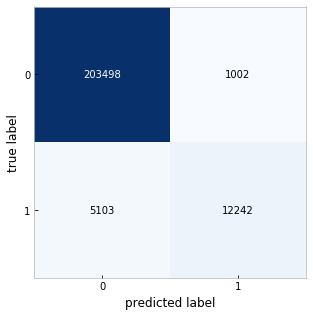

In [135]:
CM = confusion_matrix(y_test, test_y_pred4)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

# Grid Search

In [100]:
parameters = {
    'iterations': [100, 200], 
    'depth': [4,5,6,7], 
    'scale_pos_weight': [4, 5, 6, 7, 11],
    'learning_rate': [0.1]}

In [101]:
# loss_function='Recall' instead of scoring='f1'

base_model = CatBoostClassifier()
gs_model2 = GridSearchCV(
    base_model, 
    parameters, 
    verbose=True,
    scoring='f1')

In [102]:
gs_model2.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6356857	total: 152ms	remaining: 15.1s
1:	learn: 0.5893459	total: 265ms	remaining: 13s
2:	learn: 0.5482344	total: 390ms	remaining: 12.6s
3:	learn: 0.5189266	total: 502ms	remaining: 12s
4:	learn: 0.4946728	total: 623ms	remaining: 11.8s
5:	learn: 0.4681699	total: 740ms	remaining: 11.6s
6:	learn: 0.4503851	total: 859ms	remaining: 11.4s
7:	learn: 0.4351498	total: 970ms	remaining: 11.2s
8:	learn: 0.4180827	total: 1.09s	remaining: 11s
9:	learn: 0.4034708	total: 1.2s	remaining: 10.8s
10:	learn: 0.3936719	total: 1.31s	remaining: 10.6s
11:	learn: 0.3851361	total: 1.42s	remaining: 10.4s
12:	learn: 0.3740494	total: 1.55s	remaining: 10.4s
13:	learn: 0.3645212	total: 1.66s	remaining: 10.2s
14:	learn: 0.3568303	total: 1.78s	remaining: 10.1s
15:	learn: 0.3516976	total: 1.9s	remaining: 9.96s
16:	learn: 0.3467728	total: 2.01s	remaining: 9.82s
17:	learn: 0.3428048	total: 2.12s	remaining: 9.67s
18:	learn: 0.3350903	total: 2.25s	remaining: 9.6s
19:	learn: 0.3286876	total: 2.37s	remaining: 9.48s

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 161.0min finished


0:	learn: 0.5831209	total: 430ms	remaining: 1m 25s
1:	learn: 0.5034432	total: 837ms	remaining: 1m 22s
2:	learn: 0.4501891	total: 1.25s	remaining: 1m 21s
3:	learn: 0.4092481	total: 1.66s	remaining: 1m 21s
4:	learn: 0.3766404	total: 2.07s	remaining: 1m 20s
5:	learn: 0.3557492	total: 2.48s	remaining: 1m 20s
6:	learn: 0.3362733	total: 2.87s	remaining: 1m 19s
7:	learn: 0.3240854	total: 3.27s	remaining: 1m 18s
8:	learn: 0.3117583	total: 3.68s	remaining: 1m 18s
9:	learn: 0.3015521	total: 4.08s	remaining: 1m 17s
10:	learn: 0.2933353	total: 4.48s	remaining: 1m 17s
11:	learn: 0.2871736	total: 4.87s	remaining: 1m 16s
12:	learn: 0.2806268	total: 5.27s	remaining: 1m 15s
13:	learn: 0.2762715	total: 5.67s	remaining: 1m 15s
14:	learn: 0.2731143	total: 6.08s	remaining: 1m 14s
15:	learn: 0.2693689	total: 6.49s	remaining: 1m 14s
16:	learn: 0.2674198	total: 6.88s	remaining: 1m 14s
17:	learn: 0.2638412	total: 7.28s	remaining: 1m 13s
18:	learn: 0.2616622	total: 7.68s	remaining: 1m 13s
19:	learn: 0.2603275	t

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000000056CA488>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [4, 5, 6, 7], 'iterations': [100, 200],
                         'learning_rate': [0.1],
                         'scale_pos_weight': [4, 5, 6, 7, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=True)

In [103]:
gs_model2.best_score_

0.8024133957364998

In [104]:
gs_model2.best_params_

{'depth': 7, 'iterations': 200, 'learning_rate': 0.1, 'scale_pos_weight': 4}

In [105]:
y_pred_gs = gs_model2.predict(X_test)

In [106]:
# accuracy score for model with GS
accuracy_score(y_test, y_pred_gs)

0.972332033627082

In [107]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred2[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred2): .5f}")
print(f" - f1_score 1-st class: {f1_score(y_test, test_y_pred2): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred2, average='macro'): .5f}")

CatBoost classifier:
 - ROC AUC _score:  0.93119
 - accuracy_score:  0.97227
 - f1_score 1-st class:  0.80061
 - f1_score:  0.89286


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    204399
           1       0.92      0.71      0.80     17446

    accuracy                           0.97    221845
   macro avg       0.95      0.85      0.89    221845
weighted avg       0.97      0.97      0.97    221845



Как видно, модель хорошо определяет нулевой класс, precision и recall 0.94 и 1 соответствнено, но класс 1 хуже: precision и recall 0.92 и 0.3, это говорит о том, что модель не до конца обучилась верно определять 0 класс,

то есть так как у нас низкий recall но высокий precision для 1 класса - будет много единичек не выявленных, но из всех тех зачнений что считаются единичками будет много реальных единиц, то есть много фрода пройдет мимо модели, что нам не подходит

Такие значчения по classification_report и высокий false negative по confusion_matrix, скорее всего из-за несбалансированности датасета: 92% на 8%

In [ ]:
# conda install -c conda-forge imbalanced-learn 

# Undersampling - выранвниваем классы в датасете

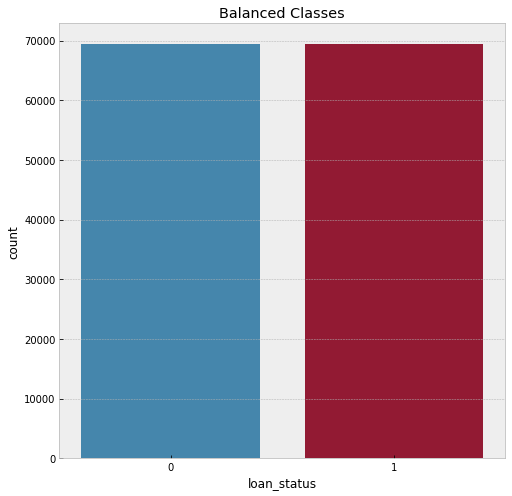

In [21]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1, random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['loan_status'] == 1]

#Randomly select 69417 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['loan_status'] == 0].sample(n=69417, random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('loan_status', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [22]:
normalized_df['loan_status'].value_counts()

1    69417
0    69417
Name: loan_status, dtype: int64

In [23]:
normalized_df.shape

(138834, 13)

# !!! Catboost Modelling on balanced target classes with NaN

In [71]:
#train/test/validation split

X = normalized_df.drop('loan_status', axis=1)
y = normalized_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [73]:
X.shape, X_train.shape, X_test.shape, X_val.shape 

((138834, 12), (97183, 12), (27767, 12), (13884, 12))

In [24]:
# # train/test split

# X = normalized_df.drop('loan_status', axis=1)
# y = normalized_df['loan_status']

# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
model_cat5 = CatBoostClassifier(iterations=200, depth=5, learning_rate=0.1)

model_cat5.fit(X_train, y_train)

0:	learn: 0.5997652	total: 66.4ms	remaining: 13.2s
1:	learn: 0.5326551	total: 118ms	remaining: 11.7s
2:	learn: 0.5023694	total: 166ms	remaining: 10.9s
3:	learn: 0.4747447	total: 214ms	remaining: 10.5s
4:	learn: 0.4564840	total: 262ms	remaining: 10.2s
5:	learn: 0.4430606	total: 319ms	remaining: 10.3s
6:	learn: 0.4329109	total: 364ms	remaining: 10s
7:	learn: 0.4249556	total: 408ms	remaining: 9.8s
8:	learn: 0.4135430	total: 458ms	remaining: 9.73s
9:	learn: 0.4034942	total: 514ms	remaining: 9.77s
10:	learn: 0.3969027	total: 558ms	remaining: 9.59s
11:	learn: 0.3930702	total: 602ms	remaining: 9.43s
12:	learn: 0.3863594	total: 647ms	remaining: 9.3s
13:	learn: 0.3833943	total: 691ms	remaining: 9.18s
14:	learn: 0.3804308	total: 740ms	remaining: 9.12s
15:	learn: 0.3771319	total: 789ms	remaining: 9.07s
16:	learn: 0.3752859	total: 832ms	remaining: 8.96s
17:	learn: 0.3729173	total: 875ms	remaining: 8.85s
18:	learn: 0.3679395	total: 919ms	remaining: 8.75s
19:	learn: 0.3640807	total: 969ms	remaining:

In [75]:
test_y_pred5 = model_cat5.predict(X_test)

In [76]:
# make predictions on a test set and get AUC score

print("Sklearn CatBoost classifier:")
y_pred5 = model_cat5.predict_proba(X_test)

print(f" - roc_auc_score: {roc_auc_score(y_test, y_pred5[:,1]): .5f}")

# roc_auc_score(y_test, y_pred[:,1])

Sklearn CatBoost classifier:
 - roc_auc_score:  0.93005


In [77]:
# Accuracy score, f1_score

print("Sklearn CatBoost classifier:")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred5): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred5): .5f}")

Sklearn CatBoost classifier:
 - accuracy_score:  0.85285
 - f1_score:  0.83412


In [78]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred5[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

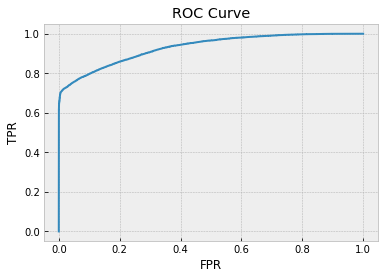

In [79]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Catboost Validation test

In [85]:
test_y_pred5_val = model_cat5.predict(X_val)

In [90]:
# make predictions on a test set and get AUC score

print("Sklearn CatBoost classifier on val test:")
y_pred5_val = model_cat5.predict_proba(X_val)

print(f" - roc_auc_score: {roc_auc_score(y_val, y_pred5_val[:,1]): .5f}")

# roc_auc_score(y_test, y_pred[:,1])

# Accuracy score, f1_score

print(f" - accuracy_score: {accuracy_score(y_val, test_y_pred5_val): .5f}")
print(f" - f1_score: {f1_score(y_val, test_y_pred5_val): .5f}")

Sklearn CatBoost classifier on val test:
 - roc_auc_score:  0.92965
 - accuracy_score:  0.85739
 - f1_score:  0.83765


In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_cat5, X_train, y_train, cv=5).std()

0:	learn: 0.6577211	total: 51.9ms	remaining: 10.3s
1:	learn: 0.6313434	total: 101ms	remaining: 10s
2:	learn: 0.6132843	total: 151ms	remaining: 9.89s
3:	learn: 0.5978100	total: 196ms	remaining: 9.58s
4:	learn: 0.5849387	total: 237ms	remaining: 9.22s
5:	learn: 0.5747384	total: 290ms	remaining: 9.38s
6:	learn: 0.5671909	total: 332ms	remaining: 9.14s
7:	learn: 0.5608728	total: 374ms	remaining: 8.97s
8:	learn: 0.5554826	total: 416ms	remaining: 8.82s
9:	learn: 0.5509310	total: 465ms	remaining: 8.83s
10:	learn: 0.5471186	total: 503ms	remaining: 8.64s
11:	learn: 0.5438673	total: 544ms	remaining: 8.52s
12:	learn: 0.5385187	total: 584ms	remaining: 8.4s
13:	learn: 0.5354708	total: 623ms	remaining: 8.27s
14:	learn: 0.5330709	total: 661ms	remaining: 8.15s
15:	learn: 0.5310486	total: 709ms	remaining: 8.16s
16:	learn: 0.5290464	total: 750ms	remaining: 8.07s
17:	learn: 0.5270680	total: 786ms	remaining: 7.95s
18:	learn: 0.5248108	total: 825ms	remaining: 7.86s
19:	learn: 0.5235034	total: 864ms	remaining

0.0032317461898607376

cross_val_score.std() is 0.003, low value, that is good for us 

# Hyperparametres on balanced classes (CatBoost)

In [91]:
# Hyperparametres

model_cat6 = CatBoostClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,   
    subsample=0.65,      
    )

model_cat6.fit(X_train, y_train)

test_y_pred6 = model_cat6.predict(X_val)

y_pred6 = model_cat6.predict_proba(X_val)

0:	learn: 0.5928054	total: 56.4ms	remaining: 11.2s
1:	learn: 0.5279587	total: 110ms	remaining: 10.8s
2:	learn: 0.4919693	total: 161ms	remaining: 10.6s
3:	learn: 0.4622052	total: 214ms	remaining: 10.5s
4:	learn: 0.4446741	total: 265ms	remaining: 10.3s
5:	learn: 0.4296320	total: 322ms	remaining: 10.4s
6:	learn: 0.4166437	total: 371ms	remaining: 10.2s
7:	learn: 0.4086310	total: 419ms	remaining: 10.1s
8:	learn: 0.3991438	total: 468ms	remaining: 9.93s
9:	learn: 0.3897248	total: 526ms	remaining: 9.99s
10:	learn: 0.3858856	total: 573ms	remaining: 9.84s
11:	learn: 0.3810622	total: 620ms	remaining: 9.71s
12:	learn: 0.3775467	total: 669ms	remaining: 9.63s
13:	learn: 0.3725312	total: 724ms	remaining: 9.62s
14:	learn: 0.3698142	total: 771ms	remaining: 9.51s
15:	learn: 0.3665380	total: 820ms	remaining: 9.43s
16:	learn: 0.3624793	total: 872ms	remaining: 9.39s
17:	learn: 0.3583692	total: 932ms	remaining: 9.43s
18:	learn: 0.3562077	total: 984ms	remaining: 9.38s
19:	learn: 0.3542551	total: 1.04s	remain

In [93]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_val, y_pred6[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_val, test_y_pred6): .5f}")
print(f" - f1_score: {f1_score(y_val, test_y_pred6): .5f}")

CatBoost classifier:
 - ROC AUC _score:  0.93033
 - accuracy_score:  0.85905
 - f1_score:  0.84047


In [135]:
subm = pd.DataFrame() # create an empty DF for final submissiob
subm['loan_status'] = model_cat5.predict_proba(X_test)[:,1] # create a new column that holds probability of first (1) class
subm.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [136]:
subm.head()

index  loan_status
0      0     0.974231
1      1     0.999972
2      2     0.237025
3      3     0.295502
4      4     0.999990

In [152]:
subm_ = pd.DataFrame() # create an empty DF for final submissiob
subm_['loan_status'] = model_cat5.predict(X_test) # create a new column that holds probability of first (1) class
subm_.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [153]:
subm_.head()

index  loan_status
0      0            1
1      1            1
2      2            0
3      3            0
4      4            1

# classification_report and confusion_matrix

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     13867
           1       0.96      0.74      0.83     13900

    accuracy                           0.85     27767
   macro avg       0.87      0.85      0.85     27767
weighted avg       0.87      0.85      0.85     27767



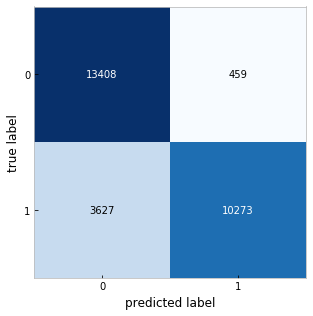

In [95]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, test_y_pred5)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

В нашей задаче явно recall важнее чем precicion, поэтому есть смысл сделать акцент на recall. 

recall - у нас 100 единичек, сколько наша модедь выявлиа из 100 ("вспомнила")

precision - у нас 100 единичек, модель выявлиа 50 единичек, сколько из этих 50 действиельно единички

то есть если у нас низкий recall но высокий precision - будет много единичек не выявленных,
но из всех тех зачнений что считаются единичками будет много реальных единиц, то есть много фрода пройдет мимо модели
а если у нас низкий  precision, но высокий recall -  будет выявлены все едиинчки, но среди всех единиц,
которые нашла модель будет много false positive, то есть фрод, который предсказан как не фрод
что в целом нормально и не страшно, в сравнении с ситуацией когда низкий recall но высокий precision, 
и когда просто пропускается фрод

Как это провернуть

https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

# CatBoost Feature Importances

In [35]:
importances = model_cat6.feature_importances_
indices = np.argsort(importances)[::-1] 

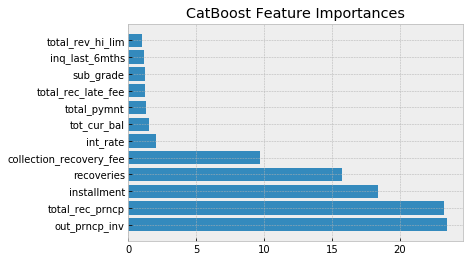

In [36]:
plt.barh(X_train.columns[indices], importances[indices])
plt.title('CatBoost Feature Importances')
plt.show()

# XGBoost Model

In [104]:
from xgboost import XGBClassifier

In [105]:
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 20                        # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 6                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14



modelXGB = XGBClassifier(n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [106]:
y_pred_xgb = modelXGB.predict(X_test)

y_pred_prob_xgb = modelXGB.predict_proba(X_test)

print("XGBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_xgb[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_xgb): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_xgb): .5f}")

XGBoost classifier:
 - ROC AUC _score:  0.93153
 - accuracy_score:  0.85501
 - f1_score:  0.83634


In [107]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_xgb[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

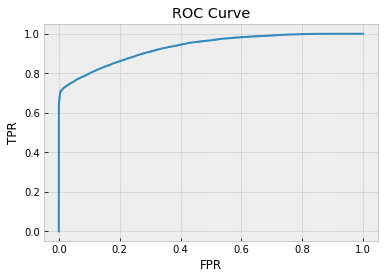

In [108]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     13867
           1       0.96      0.74      0.84     13900

    accuracy                           0.86     27767
   macro avg       0.87      0.86      0.85     27767
weighted avg       0.87      0.86      0.85     27767



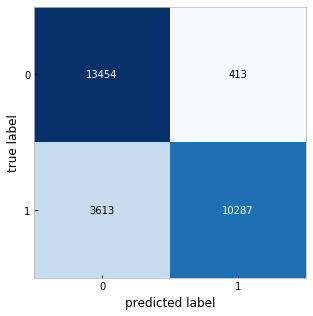

In [110]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

In [127]:
subm1 = pd.DataFrame() # create an empty DF for final submissiob
subm1['loan_status'] = modelXGB.predict_proba(X_test)[:,1] # create a new column that holds probability of first (1) class
subm1.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [128]:
subm1.head()

index  loan_status
0      0     0.986856
1      1     0.999255
2      2     0.288020
3      3     0.265250
4      4     0.999849

In [150]:
subm1_1 = pd.DataFrame() # create an empty DF for final submissiob
subm1_1['loan_status'] = modelXGB.predict(X_test)# create a new column that holds probability of first (1) class
subm1_1.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [151]:
subm1_1.head()

index  loan_status
0      0            1
1      1            1
2      2            0
3      3            0
4      4            1

# Random Forest Model

In [112]:
# Удаляем строки с нанами

new_data = normalized_df.dropna(axis = 0, how ='any')
new_data.shape

(120943, 13)

In [113]:
# train/test split

X_RF = new_data.drop('loan_status', axis=1)
y_RF = new_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X_RF, y_RF)

In [114]:
# weights in random forest
# fit(self, X, y, sample_weight=None)
# sample_weight = np.array([5 if i == 0 else 1 for i in y])


model_rf = RandomForestClassifier(oob_score=True)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
# accuracy score
y_pred_RF = model_rf.predict(X_test)

# calculate the AUC
y_pred_prob_rf = model_rf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_rf[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

In [116]:
print("Sklearn RandomForest Classifier :")

print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_rf[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_RF): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_RF): .5f}")

Sklearn RandomForest Classifier :
 - ROC AUC _score:  0.91486
 - accuracy_score:  0.83953
 - f1_score:  0.80836


In [129]:
subm2 = pd.DataFrame() # create an empty DF for final submissiob
subm2['loan_status'] = model_rf.predict_proba(X_test)[:,1] # create a new column that holds probability of first (1) class
subm2.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [131]:
subm2.head()

index  loan_status
0      0         0.99
1      1         1.00
2      2         0.38
3      3         0.22
4      4         1.00

In [148]:
subm2_1 = pd.DataFrame() # create an empty DF for final submissiob
subm2_1['loan_status'] = model_rf.predict(X_test) # create a new column that holds probability of first (1) class
subm2_1.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [149]:
subm2_1.head()

index  loan_status
0      0            1
1      1            1
2      2            0
3      3            0
4      4            1

# Decison Tree

In [51]:
from sklearn import tree

In [56]:
# train/test split

X_RF = new_data.drop('loan_status', axis=1)
y_RF = new_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X_RF, y_RF)

In [57]:
# fit the decision tree model

modelDT = tree.DecisionTreeClassifier(criterion='entropy')   # (criterion='gini')  criterion='mse'
modelDT.fit(X_train, y_train)                                                

# max_depth =2 - глубина разветвления

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
y_predDT = modelDT.predict(X_test)
y_predDT1 = modelDT.predict_proba(X_test)


In [63]:
print("DecisionTreeClassifier :")
print(f" - roc_auc_score: {roc_auc_score(y_test, y_predDT1[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, y_predDT): .5f}")
print(f" - f1_score: {f1_score(y_test, y_predDT): .5f}")

DecisionTreeClassifier :
 - roc_auc_score:  0.79354
 - accuracy_score:  0.79432
 - f1_score:  0.78132


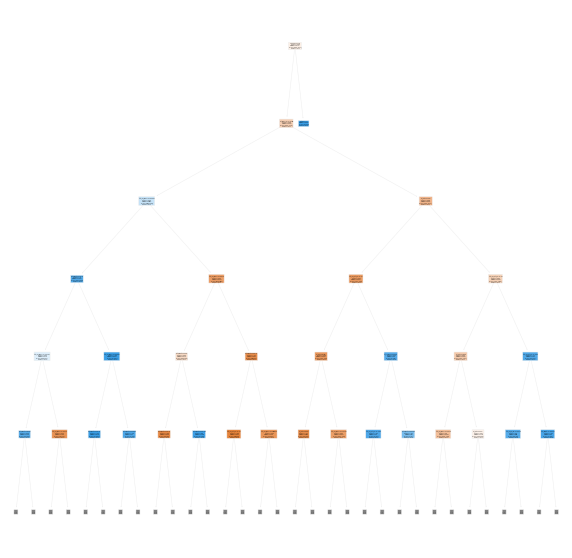

In [67]:
plt.figure(figsize=(10,10))
tree.plot_tree(modelDT, max_depth=5, filled=True, rounded=True,
               feature_names=X.columns.tolist(), proportion=False,
               class_names=['Class 1', 'Class 0'])
plt.show()

In [144]:
subm3 = pd.DataFrame() # create an empty DF for final submissiob
subm3['loan_status'] = modelXGB.predict_proba(X_test)[:,1] # create a new column that holds probability of first (1) class
subm3.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [145]:
subm3.head()

index  loan_status
0      0     0.986856
1      1     0.999255
2      2     0.288020
3      3     0.265250
4      4     0.999849

In [146]:
subm3_1 = pd.DataFrame() # create an empty DF for final submissiob
subm3_1['loan_status'] = modelXGB.predict(X_test) # create a new column that holds probability of first (1) class
subm3_1.reset_index(drop=False, inplace=True) # duplicate index as a columns
#subm.to_csv('my_submission.csv', index=False) # save as csv file

In [147]:
subm3_1.head()

index  loan_status
0      0            1
1      1            1
2      2            0
3      3            0
4      4            1

In [169]:
subm3_1['loan_status'].head(1)

0    1
Name: loan_status, dtype: int32

# Проверка на возможность применения ансамбля моделей, расчет корреляций между output моделей 


In [162]:
from scipy.stats import spearmanr

In [163]:
corr, _ = spearmanr(subm3_1['loan_status'], subm2_1['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.879


In [164]:
corr, _ = spearmanr(subm3_1['loan_status'], subm1_1['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 1.000


In [165]:
corr, _ = spearmanr(subm3_1['loan_status'], subm_['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.967


In [166]:
corr, _ = spearmanr(subm2_1['loan_status'], subm1_1['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.879


In [167]:
corr, _ = spearmanr(subm2_1['loan_status'], subm_['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.877


In [168]:
corr, _ = spearmanr(subm1_1['loan_status'], subm_['loan_status'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.967


# Ensemble

In [204]:
# creating new df from outputs of 2 models subm2_1(Random Forest) and subm_ (Catboost)
# here is the lowest corr

data = [subm2_1["loan_status"], subm_["loan_status"]]
headers = ["subm2_1", "subm_"]
df_ensemble = pd.concat(data, axis=1, keys=headers)

In [205]:
df_ensemble.head()

subm2_1  subm_
0        1      1
1        1      1
2        0      0
3        0      0
4        1      1

In [206]:
X_ens = df_ensemble
X_ens.shape

(30236, 2)

In [207]:
y_ens = y_test
y_ens.shape

(30236,)

In [208]:
# train/test split

X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(X_ens, y_ens)

In [209]:
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 20                        # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 6                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14



modelXGB_ens = XGBClassifier(n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

modelXGB_ens.fit(X_train_ens, y_train_ens)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [210]:
y_pred_xgb_ens = modelXGB_ens.predict(X_test_ens)

y_pred_prob_xgb_ens = modelXGB_ens.predict_proba(X_test_ens)

print("XGBoost classifierMetaModel:")
print(f" - ROC AUC _score: {roc_auc_score(y_test_ens, y_pred_prob_xgb_ens[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test_ens, y_pred_xgb_ens): .5f}")
print(f" - f1_score: {f1_score(y_test_ens, y_pred_xgb_ens): .5f}")

XGBoost classifierMetaModel:
 - ROC AUC _score:  0.84981
 - accuracy_score:  0.84350
 - f1_score:  0.80533


In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ens, y_pred_xgb_ens))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4053
           1       0.95      0.70      0.81      3506

    accuracy                           0.84      7559
   macro avg       0.87      0.83      0.84      7559
weighted avg       0.86      0.84      0.84      7559



# Теперь можно попробовать следующее:
    - поиграться с параметрами модели (но то такое)
    - сделать то же самое на тех же фичах на balanced classes, но заскейлить данные
    - добавить часть важных категориальных колонок с лейбами и переранить модель
    - построить Feature Importances для всех новых фич и дельнуть худшие и переранить модель (но не всегда   работает)
    - для построения других моделей (RandomForest, LinearRegression, XGBoost) нужно избавиться от всех нанов 
    - можно сделать акцент на recall (как по ссылке выше)

# CatBoost on numeric + categ features without Nans

In [23]:
# # Удаляем строки с нанами

# new_data = df.dropna(axis = 0, how ='any')
# new_data.shape

(817103, 17)

In [37]:
columns_to_keep_after_feature_analysys = ['addr_state','int_rate', 'term', 'installment', 'annual_inc', 'sub_grade',  'emp_title', 'home_ownership', 'purpose',  'dti', 'pub_rec', 'recoveries']

# A lot NAN - 'emp_length' 'total_pympt',

In [38]:
from sklearn.preprocessing import LabelEncoder

new_data=new_data.apply(LabelEncoder().fit_transform) # label Encoding for all non-numeric columns in dataframe df

In [39]:
new_data = new_data[columns_to_keep_after_feature_analysys + ['loan_status']]
new_data.head(1)

addr_state  int_rate  term  installment  annual_inc  sub_grade  \
42535          22        42     0        54622       15200          6   

       emp_title  home_ownership  purpose   dti  pub_rec  recoveries  \
42535     196999               4        2  2287        0           0   

       loan_status  
42535            0

In [40]:
new_data['loan_status'].value_counts()

0    701237
1     51701
Name: loan_status, dtype: int64

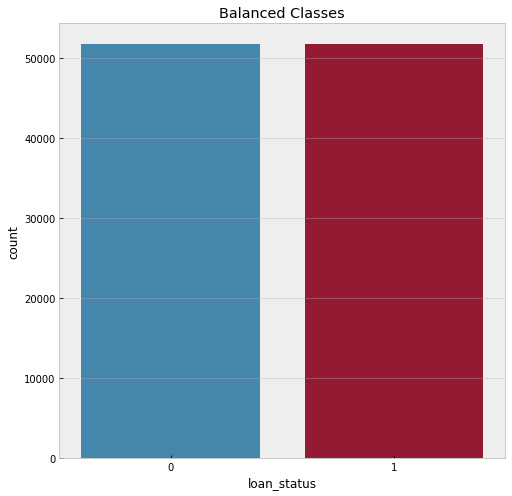

In [41]:
# Shuffle the Dataset.
shuffled_df1 = new_data.sample(frac=1, random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df1 = shuffled_df1.loc[shuffled_df1['loan_status'] == 1]

#Randomly select 69417 observations from the non-fraud (majority class)
non_fraud_df1 = shuffled_df1.loc[shuffled_df1['loan_status'] == 0].sample(n=51701, random_state=42)

# Concatenate both dataframes again
normalized_df1 = pd.concat([fraud_df1, non_fraud_df1])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('loan_status', data=normalized_df1)
plt.title('Balanced Classes')
plt.show()

In [42]:
normalized_df1['loan_status'].value_counts()

1    51701
0    51701
Name: loan_status, dtype: int64

In [43]:
normalized_df1.shape

(103402, 13)

In [44]:
# train/test split

X = normalized_df1.drop('loan_status', axis=1)
y = normalized_df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
model_cat7 = CatBoostClassifier(iterations=200, depth=5, learning_rate=0.1)

model_cat7.fit(X_train, y_train)

0:	learn: 0.6360186	total: 55.6ms	remaining: 11.1s
1:	learn: 0.6034994	total: 97.1ms	remaining: 9.61s
2:	learn: 0.5818220	total: 136ms	remaining: 8.94s
3:	learn: 0.5681615	total: 174ms	remaining: 8.54s
4:	learn: 0.5595613	total: 223ms	remaining: 8.69s
5:	learn: 0.5534286	total: 263ms	remaining: 8.49s
6:	learn: 0.5493043	total: 304ms	remaining: 8.39s
7:	learn: 0.5460136	total: 349ms	remaining: 8.37s
8:	learn: 0.5428717	total: 395ms	remaining: 8.38s
9:	learn: 0.5407785	total: 440ms	remaining: 8.35s
10:	learn: 0.5390950	total: 490ms	remaining: 8.41s
11:	learn: 0.5378557	total: 532ms	remaining: 8.33s
12:	learn: 0.5364327	total: 577ms	remaining: 8.31s
13:	learn: 0.5351569	total: 620ms	remaining: 8.24s
14:	learn: 0.5340870	total: 664ms	remaining: 8.19s
15:	learn: 0.5331054	total: 709ms	remaining: 8.16s
16:	learn: 0.5323066	total: 744ms	remaining: 8s
17:	learn: 0.5315123	total: 783ms	remaining: 7.92s
18:	learn: 0.5307321	total: 822ms	remaining: 7.83s
19:	learn: 0.5300543	total: 876ms	remainin

In [46]:
test_y_pred7 = model_cat7.predict(X_test)
y_pred7 = model_cat7.predict_proba(X_test)

In [47]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred7[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred7): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred7): .5f}")

CatBoost classifier:
 - ROC AUC _score:  0.80472
 - accuracy_score:  0.71390
 - f1_score:  0.70098


In [48]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred7[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

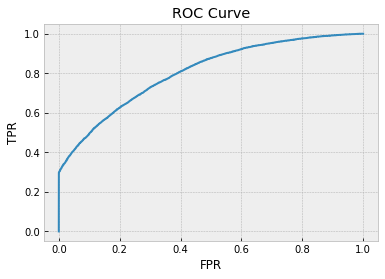

In [49]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [79]:
# Hyperparametres

model_cat7_hyp = CatBoostClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,   
    subsample=0.65,      
    )

model_cat7_hyp.fit(X_train, y_train)

test_y_pred7_hyp = model_cat7_hyp.predict(X_test)

y_pred7_hyp = model_cat7_hyp.predict_proba(X_test)

0:	learn: 0.6367116	total: 40.9ms	remaining: 8.14s
1:	learn: 0.6025734	total: 80.1ms	remaining: 7.92s
2:	learn: 0.5805525	total: 118ms	remaining: 7.73s
3:	learn: 0.5679273	total: 157ms	remaining: 7.69s
4:	learn: 0.5587734	total: 197ms	remaining: 7.68s
5:	learn: 0.5526559	total: 235ms	remaining: 7.61s
6:	learn: 0.5478835	total: 288ms	remaining: 7.93s
7:	learn: 0.5443709	total: 327ms	remaining: 7.86s
8:	learn: 0.5416866	total: 370ms	remaining: 7.86s
9:	learn: 0.5391729	total: 410ms	remaining: 7.79s
10:	learn: 0.5374713	total: 452ms	remaining: 7.77s
11:	learn: 0.5360982	total: 490ms	remaining: 7.68s
12:	learn: 0.5347097	total: 537ms	remaining: 7.72s
13:	learn: 0.5333062	total: 579ms	remaining: 7.7s
14:	learn: 0.5321016	total: 619ms	remaining: 7.63s
15:	learn: 0.5312419	total: 658ms	remaining: 7.57s
16:	learn: 0.5305015	total: 698ms	remaining: 7.51s
17:	learn: 0.5298773	total: 737ms	remaining: 7.46s
18:	learn: 0.5289241	total: 780ms	remaining: 7.43s
19:	learn: 0.5283191	total: 826ms	remain

In [80]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred7_hyp[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred7_hyp): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred7_hyp): .5f}")

CatBoost classifier:
 - ROC AUC _score:  0.80489
 - accuracy_score:  0.71363
 - f1_score:  0.70285


# CatBoost on scaled features without nans

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
# train/test split

X = normalized_df1.drop('loan_status', axis=1)
y = normalized_df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [70]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)


In [71]:
model_cat8 = CatBoostClassifier(iterations=200, depth=5, learning_rate=0.1)

model_cat8.fit(X_train_scaled, y_train)

0:	learn: 0.6361532	total: 45.6ms	remaining: 9.07s
1:	learn: 0.6023476	total: 91.2ms	remaining: 9.03s
2:	learn: 0.5810251	total: 140ms	remaining: 9.18s
3:	learn: 0.5684059	total: 187ms	remaining: 9.17s
4:	learn: 0.5595640	total: 228ms	remaining: 8.88s
5:	learn: 0.5535593	total: 280ms	remaining: 9.04s
6:	learn: 0.5494142	total: 316ms	remaining: 8.71s
7:	learn: 0.5461811	total: 352ms	remaining: 8.44s
8:	learn: 0.5434073	total: 388ms	remaining: 8.24s
9:	learn: 0.5411543	total: 431ms	remaining: 8.18s
10:	learn: 0.5389080	total: 479ms	remaining: 8.22s
11:	learn: 0.5371964	total: 518ms	remaining: 8.11s
12:	learn: 0.5357186	total: 553ms	remaining: 7.96s
13:	learn: 0.5344367	total: 589ms	remaining: 7.83s
14:	learn: 0.5334559	total: 624ms	remaining: 7.69s
15:	learn: 0.5323822	total: 660ms	remaining: 7.59s
16:	learn: 0.5315343	total: 700ms	remaining: 7.53s
17:	learn: 0.5308145	total: 737ms	remaining: 7.45s
18:	learn: 0.5300772	total: 772ms	remaining: 7.36s
19:	learn: 0.5295553	total: 808ms	remai

In [72]:
X_test_scaled = std_scaler.fit_transform(X_test)


In [73]:
test_y_pred8 = model_cat8.predict(X_test_scaled)
y_pred8 = model_cat8.predict_proba(X_test_scaled)

In [74]:
print("CatBoost classifier_scaled:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred8[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred8): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred8): .5f}")

CatBoost classifier_scaled:
 - ROC AUC _score:  0.80311
 - accuracy_score:  0.71316
 - f1_score:  0.70138


In [75]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred8[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

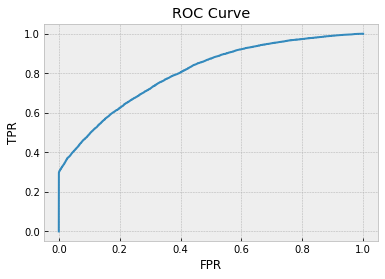

In [76]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_y_pred8))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     12850
           1       0.74      0.67      0.70     13001

    accuracy                           0.71     25851
   macro avg       0.71      0.71      0.71     25851
weighted avg       0.72      0.71      0.71     25851



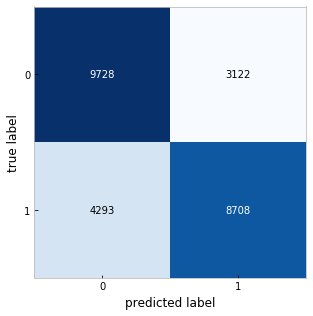

In [78]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, test_y_pred8)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

In [81]:
# Hyperparametres

model_cat8_hyp = CatBoostClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=6,   
    subsample=0.65,      
    )

model_cat8_hyp.fit(X_train_scaled, y_train)

test_y_pred8_hyp = model_cat8_hyp.predict(X_test_scaled)

y_pred8_hyp = model_cat8_hyp.predict_proba(X_test_scaled)

0:	learn: 0.6367116	total: 48.4ms	remaining: 9.63s
1:	learn: 0.6025734	total: 90.4ms	remaining: 8.95s
2:	learn: 0.5805525	total: 130ms	remaining: 8.51s
3:	learn: 0.5679273	total: 172ms	remaining: 8.4s
4:	learn: 0.5587734	total: 214ms	remaining: 8.35s
5:	learn: 0.5526559	total: 257ms	remaining: 8.31s
6:	learn: 0.5478835	total: 304ms	remaining: 8.38s
7:	learn: 0.5443709	total: 343ms	remaining: 8.23s
8:	learn: 0.5416866	total: 382ms	remaining: 8.11s
9:	learn: 0.5391729	total: 421ms	remaining: 7.99s
10:	learn: 0.5374713	total: 461ms	remaining: 7.92s
11:	learn: 0.5360982	total: 509ms	remaining: 7.97s
12:	learn: 0.5347097	total: 547ms	remaining: 7.87s
13:	learn: 0.5333062	total: 584ms	remaining: 7.76s
14:	learn: 0.5321016	total: 622ms	remaining: 7.67s
15:	learn: 0.5312419	total: 658ms	remaining: 7.57s
16:	learn: 0.5305015	total: 707ms	remaining: 7.61s
17:	learn: 0.5298773	total: 746ms	remaining: 7.55s
18:	learn: 0.5289241	total: 785ms	remaining: 7.48s
19:	learn: 0.5283191	total: 826ms	remain

In [82]:
print("CatBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred8_hyp[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred8_hyp): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred8_hyp): .5f}")

CatBoost classifier:
 - ROC AUC _score:  0.80348
 - accuracy_score:  0.71363
 - f1_score:  0.70167


# XGBoost on scaled features

In [82]:
from xgboost import XGBClassifier

In [88]:
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 20                        # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 6                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14



modelXGB = XGBClassifier(n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

modelXGB.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [89]:
y_pred_xgb = modelXGB.predict(X_test_scaled)

y_pred_prob_xgb = modelXGB.predict_proba(X_test_scaled)

print("XGBoost classifier:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_xgb[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_xgb): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_xgb): .5f}")

XGBoost classifier:
 - ROC AUC _score:  0.80525
 - accuracy_score:  0.71564
 - f1_score:  0.70439


In [90]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_xgb[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

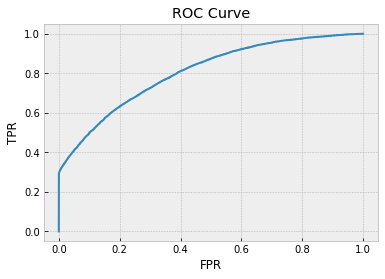

In [91]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     12715
           1       0.75      0.67      0.70     13136

    accuracy                           0.72     25851
   macro avg       0.72      0.72      0.72     25851
weighted avg       0.72      0.72      0.72     25851



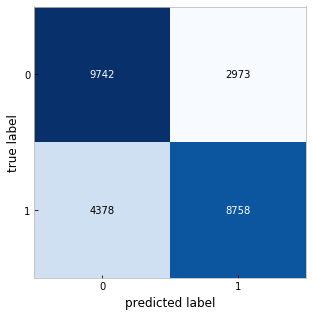

In [94]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

# RandomForest on scaled data

In [71]:
model_rf = RandomForestClassifier(oob_score=True)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# accuracy score
y_pred_RF = model_rf.predict(X_test_scaled)

# calculate the AUC
y_pred_prob_rf = model_rf.predict_proba(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_rf[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

In [77]:
print("Sklearn RandomForest Classifier :")

print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred_prob_rf[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, y_pred_RF): .5f}")
print(f" - f1_score: {f1_score(y_test, y_pred_RF): .5f}")

Sklearn RandomForest Classifier :
 - ROC AUC _score:  0.79115
 - accuracy_score:  0.70326
 - f1_score:  0.68927


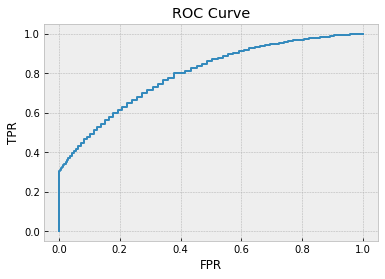

In [78]:
# ROC Curve Visualization

plt.step(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     12715
           1       0.74      0.65      0.69     13136

    accuracy                           0.70     25851
   macro avg       0.71      0.70      0.70     25851
weighted avg       0.71      0.70      0.70     25851



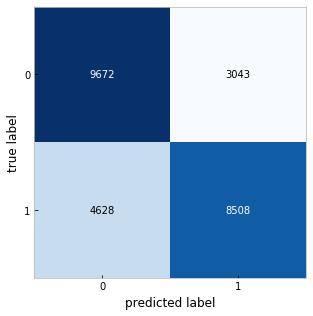

In [81]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred_RF)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))

# Linear Regression on scaled features

In [66]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred_reg = reg.predict(X_test_scaled)


In [67]:
roc_auc_score(y_test, y_pred_reg)

0.7846294166643117

In [70]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_reg)   # y_temp, y_pred
print('coefficient of determination:', score)


coefficient of determination: 0.23511164311201593


# PCA

In [109]:
from sklearn.decomposition import PCA
reduce_dim = PCA(0.95)


In [110]:
X_train_reduced = reduce_dim.fit_transform(X_train_scaled)


In [111]:
model_cat9 = CatBoostClassifier(iterations=200, depth=5, learning_rate=0.1)

model_cat9.fit(X_train_reduced, y_train)

0:	learn: 0.6486348	total: 53.3ms	remaining: 10.6s
1:	learn: 0.6092655	total: 113ms	remaining: 11.2s
2:	learn: 0.5855556	total: 164ms	remaining: 10.7s
3:	learn: 0.5617220	total: 217ms	remaining: 10.6s
4:	learn: 0.5454725	total: 268ms	remaining: 10.5s
5:	learn: 0.5322675	total: 322ms	remaining: 10.4s
6:	learn: 0.5192162	total: 375ms	remaining: 10.3s
7:	learn: 0.5087261	total: 420ms	remaining: 10.1s
8:	learn: 0.4991231	total: 469ms	remaining: 9.95s
9:	learn: 0.4920908	total: 523ms	remaining: 9.93s
10:	learn: 0.4852626	total: 571ms	remaining: 9.81s
11:	learn: 0.4788523	total: 616ms	remaining: 9.64s
12:	learn: 0.4737790	total: 660ms	remaining: 9.5s
13:	learn: 0.4688992	total: 713ms	remaining: 9.47s
14:	learn: 0.4620747	total: 759ms	remaining: 9.36s
15:	learn: 0.4570284	total: 802ms	remaining: 9.22s
16:	learn: 0.4523902	total: 840ms	remaining: 9.04s
17:	learn: 0.4477825	total: 883ms	remaining: 8.93s
18:	learn: 0.4442926	total: 929ms	remaining: 8.85s
19:	learn: 0.4406553	total: 972ms	remaini

In [112]:
X_test_reduced = reduce_dim.fit_transform(X_test_scaled)


In [116]:
test_y_pred9 = model_cat9.predict(X_test_reduced)
y_pred9 = model_cat9.predict_proba(X_test_reduced)

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:228: Feature 31 is present in model but not in pool.

In [ ]:
print("CatBoost classifier_scaled:")
print(f" - ROC AUC _score: {roc_auc_score(y_test, y_pred9[:,1]): .5f}")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred9): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred9): .5f}")

# Попробуем на новых фичах но с нанами

In [74]:
df1 = df.copy()
df1 = df1[columns_to_keep_after_feature_analysys + ['loan_status']]
df1.shape

(887379, 13)

In [68]:
df1.shape

(887379, 13)

In [75]:
df1 = df1.dropna(axis = 0, how ='any')
df1.shape

(835900, 13)

In [71]:
from sklearn.preprocessing import LabelEncoder

new_data1 = new_data1.apply(LabelEncoder().fit_transform)

In [ ]:
#UNDERSAMPLING

# Shuffle the Dataset.
# shuffled_df = credit_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
# fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

# Randomly select 492 observations from the non-fraud (majority class)
# non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
# normalized_df = pd.concat([fraud_df, non_fraud_df])

# plot the dataset after the undersampling
# plt.figure(figsize=(8, 8))
# sns.countplot('Class', data=normalized_df)
# plt.title('Balanced Classes')
# plt.show()

In [ ]:
# # формирует равные классы и тренирует модель, но не должно быть нанов

# from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# #Create an object of the classifier.
# bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=0)

# y_train = df['loan_status']
# X_train = df.drop(['loan_status'], axis=1, inplace=False)

# #Train the classifier.
# bbc.fit(X_train, y_train)
# preds = bbc.predict(X_train)

# Oversampling

In [ ]:
# OVERSAMPLING
# from imblearn.over_sampling import SMOTE

# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='minority', random_state=7)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = normalized_df.columns